In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 11.4 MB/s 
     |████████████████████████████████| 453 kB 42.1 MB/s 


In [ ]:
import os

In [ ]:
os.chdir('drive/MyDrive')

In [ ]:
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

---
# 1. Data import
---

### >> 사용할 library

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf

---
# 2. Dataset
---


### >> 사용할 데이터셋 : 5가지 라벨링

*   answer : 설문조사 응답
*   label : 긍부정 라벨링 (0, 0.3, 0.5, 0.7, 1)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/BOAZ/conference/labeling5.csv', encoding='utf-8')

In [ ]:
df = df.iloc[:, [0, 6]]
df.head(5)

,answer,나현
0,왕,0.5
1,무슨 일 있었오? ㅠ,0.0
2,왜 우울한지 물어본다,0.0
3,왜 우울하니?,0.0
4,무슨일이니~,0.3


In [ ]:
df.shape # 1269개

(1269, 2)

In [ ]:
# 결측치

df.isnull().sum()

answer    0
나현        0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1269 entries, 0 to 1268
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   answer  1269 non-null   object 
 1   나현      1269 non-null   float64
dtypes: float64(1), object(1)
memory usage: 20.0+ KB


In [ ]:
# 컬럼명 변경

df.rename(columns = {'나현':'label'} , inplace = True)
df.head(3)

,answer,label
0,왕,0.5
1,무슨 일 있었오? ㅠ,0.0
2,왜 우울한지 물어본다,0.0


In [ ]:
# 중복 제거

df = df.drop_duplicates(['answer','label'])
df

,answer,label
0,왕,0.5
1,무슨 일 있었오? ㅠ,0.0
2,왜 우울한지 물어본다,0.0
3,왜 우울하니?,0.0
4,무슨일이니~,0.3
...,...,...
1264,시간을 돌리고 싶다,0.5
1265,오 2년 존버해야겠다 사길 잘했네,1.0
1266,카카오일단 조금 넣어봄,1.0
1267,2년이나?,0.3


In [ ]:
df.shape # 1095개

(1095, 2)

< The number of label >
- The number of data :  1095
- The number of target 1 (Yse)  :  330
- The number of target 1 (Yse)  :  132
- The number of target 1 (Yse)  :  96
- The number of target 1 (Yse)  :  111
- The number of target 0 (No) :  426


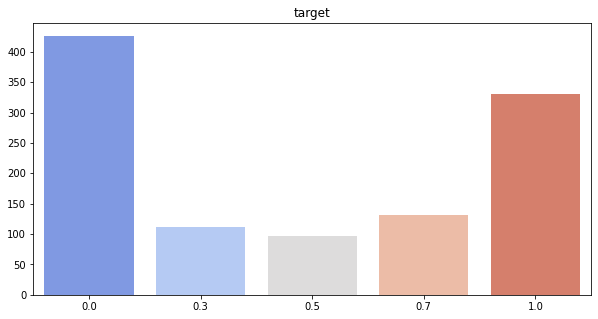

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(df['label'] , palette='coolwarm', alpha=1.0); plt.xlabel(''), plt.ylabel(''); plt.title('target');
print("< The number of label >")
print(f"- The number of data :  {len(df)}")
print(f"- The number of target 1 (Yse)  :  {len(df[df['label'] == 1])}")
print(f"- The number of target 1 (Yse)  :  {len(df[df['label'] == 0.7])}")
print(f"- The number of target 1 (Yse)  :  {len(df[df['label'] == 0.5])}")
print(f"- The number of target 1 (Yse)  :  {len(df[df['label'] == 0.3])}")
print(f"- The number of target 0 (No) :  {len(df[df['label'] == 0])}")

In [ ]:
for ans in df['answer'] :
  print(ans)

왕
무슨 일 있었오? ㅠ
왜 우울한지 물어본다
왜 우울하니?
무슨일이니~
염색 색깔뭐야
잘했네
이쁘다
왜 우울해?
이쁘네
염색한 것도 잘 어울리네
잘했어
헐~
왜우울해 ㅠㅠㅜㅜ
염색? 이쁘네 근데 왜 우울해?
무슨일잇음?
우울한데 왜 염색을 해
잘했어  예쁘네~
너랑 잘어울려
무슨색이야?
무슨일이야ㅠㅠ
오 염색잘했는데? 이쁨
예쁘네
왜 우울한데
왜 우울하냐고 물어본다
우울한거랑 염색이 무슨 상관인지 모르겠지만 잘했다고 칭찬해주며 달래준다
오 이쁘다
이쁘네 잘어울린다!
어떤색으로? 왜 우울해?
잘어울려
완전 잘 어울려 예뿌다!!
왜 우울해??
기분전환에 염색하는거 좋은 일이지!
무슨일있어? 무슨색으로?
왜 우울했아?
왜 우울했는지 이유를 물어보면서 색은 너무 찰떡이라고 할 거
잘 어울린다. 근데 무슨 일 있어?
왜 우울햇으
무슨일 있었는지
왜 우울해!!!
그래서 염색으로 기분이 바뀌었어?
그렇구나
무슨 일 때문에 우울해?
무슨 일 있었어?
머리 예뿌다
왜 우울해
우울해서 염색했다고 하니까 색이 어떻든 일단은 색에 대해 칭찬해준다
무슨색으로?
무슨색?
왜 우울한데? 무슨일있어?
왜 우울해? 괜찮아?
이뻐
오 왜? 무슨 일 있었어?
예쁘네~ 잘 어울리네~~
왜 우울?
왜 무슨일 있었나 ? ㅠㅠ
ㅠㅠㅠㅠ왜 요즈음힘든일있어?
왜 무슨 일이야!
엥 근데 잘어울린다 너랑
오 무슨색?
잘어울린다!
오 머리 이쁘다 근데 왜 우울하니?
기분전환? 염색 잘 됐다. 얼마주고 했어?
무슨색
아 진짜?
무슨일있어?
왜 우울해 ㅠㅠ 뭐 때문이야
왜 우울한데??!
왜?! 무슨 일 있어?? 왜 우울해..?
오 염색 잘되었다
왜 우울한데요?
헐 무슨일있어?
무슨색으로 염색했어?
부럽다
무슨 색으로 했어?
왜 우울해? 무슨 일 있어?
화이팅
싸웠어?
염색 잘어울린다. 근데 왜 우울해?? 무슨 일 있어?
아 그렇구나
우울한데 왜 염색을해
아 그래
무슨 색으로?
잘 어울린다
왜 우울한데?
기분이 좀 나아졌어?
오 색깔 이쁘다(안 이뻐도 이쁘다 함) 근데 무슨일 있어?
머리 색이 잘 어울린다는 등 

---
# 3. 한국어 텍스트 데이터 전처리
---

### >> 정규표현식 적용

In [ ]:
df['nor_answer'] = df['answer'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "")

In [ ]:
df[:5]

,answer,label,nor_answer
0,왕,0.5,왕
1,무슨 일 있었오? ㅠ,0.0,무슨 일 있었오 ㅠ
2,왜 우울한지 물어본다,0.0,왜 우울한지 물어본다
3,왜 우울하니?,0.0,왜 우울하니
4,무슨일이니~,0.3,무슨일이니


### >> 다중 공백 제거

In [ ]:
df['nor_answer'] = df['nor_answer'].str.replace("  ", " ")

In [ ]:
df[:5]

,answer,label,nor_answer
0,왕,0.5,왕
1,무슨 일 있었오? ㅠ,0.0,무슨 일 있었오 ㅠ
2,왜 우울한지 물어본다,0.0,왜 우울한지 물어본다
3,왜 우울하니?,0.0,왜 우울하니
4,무슨일이니~,0.3,무슨일이니


### >> 토큰화
*   말뭉치를 주어진 단위(token)로 나누는 과정
*   형태소 분석기 : Okt 사용

In [ ]:
from tensorflow.keras.layers import Dense, Embedding, Bidirectional, LSTM, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from konlpy.tag import Okt 

In [ ]:
okt = Okt() # 명사 형태소 추출 함수

### >> 불용어 제거

In [ ]:
stop_words = pd.read_csv('/content/drive/MyDrive/BOAZ/conference/bul.txt',header = None)[0].values

In [ ]:
tokenized = []

for answer in tqdm(df['nor_answer']) :
  if answer is not np.nan: # NaN값 미포함
    result = okt.morphs(answer) # 형태소
    result = [x for x in result if x not in stop_words] # 불용어 제거
    tokenized.append(result)

  0%|          | 0/1095 [00:00<?, ?it/s]

In [ ]:
tokenized

[['왕'],
 ['있었오', 'ㅠ'],
 ['우울한지', '물어본다'],
 ['우울하니'],
 ['일이', '니'],
 ['염색', '색깔', '뭐'],
 ['잘', '했네'],
 ['이쁘다'],
 ['우울해'],
 ['이쁘네'],
 ['염색', '한', '도', '잘', '어울리네'],
 ['잘', '했어'],
 ['헐'],
 ['우울해', 'ㅠㅠㅜㅜ'],
 ['염색', '이쁘네', '근데', '우울해'],
 ['잇음'],
 ['우울한데', '염색', '해'],
 ['잘', '했어', '예쁘네'],
 ['랑', '잘', '어울려'],
 ['색', '이야'],
 ['일이', 'ㅠㅠ'],
 ['염색', '잘', '했는데', '이쁨'],
 ['예쁘네'],
 ['우울한데'],
 ['우울하냐고', '물어본다'],
 ['우울한거랑', '염색', '상관', '인지', '모르겠지만', '잘', '했다고', '칭찬', '해주며', '달래준다'],
 ['이쁘다'],
 ['이쁘네', '잘', '어울린다'],
 ['색', '우울해'],
 ['잘', '어울려'],
 ['완전', '잘', '어울려', '예뿌', '다'],
 ['우울해'],
 ['기분', '전환', '염색', '하는거', '좋은', '일이', '지'],
 ['있어', '색'],
 ['우울했아'],
 ['우울했는지', '이유', '물어보면서', '색', '은', '너무', '찰떡', '이라고', '할', '거'],
 ['잘', '어울린다', '근데', '있어'],
 ['우울', '햇', '으'],
 ['있었는지'],
 ['우울해'],
 ['염색', '기분', '바뀌었어'],
 ['그렇구나'],
 ['때문', '우울해'],
 ['있었어'],
 ['머리', '예뿌', '다'],
 ['우울해'],
 ['우울해서', '염색', '했다고', '하니까', '색', '어떻든', '은', '색', '대해', '칭찬', '해준다'],
 ['색'],
 ['색'],
 ['우울한데', '있어'],
 ['우울해', '괜찮아'],
 ['이뻐'

### >> 정수 인코딩

In [ ]:
df = df.dropna(axis=0)
df

,answer,label,nor_answer
0,왕,0.5,왕
1,무슨 일 있었오? ㅠ,0.0,무슨 일 있었오 ㅠ
2,왜 우울한지 물어본다,0.0,왜 우울한지 물어본다
3,왜 우울하니?,0.0,왜 우울하니
4,무슨일이니~,0.3,무슨일이니
...,...,...,...
1264,시간을 돌리고 싶다,0.5,시간을 돌리고 싶다
1265,오 2년 존버해야겠다 사길 잘했네,1.0,오 년 존버해야겠다 사길 잘했네
1266,카카오일단 조금 넣어봄,1.0,카카오일단 조금 넣어봄
1267,2년이나?,0.3,년이나


In [ ]:
df = df.reset_index()

In [ ]:
X_data = pd.DataFrame(df['nor_answer'])
y_data = pd.DataFrame(df['label'])

In [ ]:
y_data

,label
0,0.5
1,0.0
2,0.0
3,0.0
4,0.3
...,...
1090,0.5
1091,1.0
1092,1.0
1093,0.3


In [ ]:
vocab_size = 1000

token = Tokenizer(num_words = vocab_size)
token.fit_on_texts(tokenized)
print(tokenized[:5])

X_label_data = token.texts_to_sequences(tokenized)
print(X_label_data[:5])

[['왕'], ['있었오', 'ㅠ'], ['우울한지', '물어본다'], ['우울하니'], ['일이', '니']]
[[585], [586, 73], [338, 104], [339], [129, 57]]


In [ ]:
X_label_data

[[585],
 [586, 73],
 [338, 104],
 [339],
 [129, 57],
 [25, 236, 12],
 [2, 237],
 [169],
 [30],
 [238],
 [25, 16, 17, 2, 239],
 [2, 67],
 [170],
 [30, 587],
 [25, 238, 22, 30],
 [588],
 [49, 25, 13],
 [2, 67, 171],
 [172, 2, 240],
 [28, 105],
 [129, 106],
 [25, 2, 74, 589],
 [171],
 [49],
 [590, 104],
 [591, 25, 340, 88, 592, 2, 130, 58, 593, 594],
 [169],
 [238, 2, 75],
 [28, 30],
 [2, 240],
 [131, 2, 240, 341, 8],
 [30],
 [5, 241, 25, 242, 173, 129, 26],
 [59, 28],
 [595],
 [596, 243, 597, 28, 6, 10, 598, 342, 18, 23],
 [2, 75, 22, 59],
 [174, 599, 244],
 [600],
 [30],
 [25, 5, 601],
 [245],
 [107, 30],
 [175],
 [89, 341, 8],
 [30],
 [602, 25, 130, 343, 28, 603, 6, 28, 132, 58, 60],
 [28],
 [28],
 [49, 59],
 [30, 604],
 [605],
 [175],
 [171, 2, 239],
 [174],
 [606, 106],
 [607, 608, 609, 610],
 [129],
 [90, 22, 2, 75, 172],
 [28],
 [2, 75],
 [89, 169, 22, 339],
 [5, 241, 25, 2, 611, 344, 67],
 [28],
 [91],
 [59],
 [30, 106, 12, 107, 105],
 [49],
 [59, 30],
 [25, 2, 612],
 [613],
 [170

In [ ]:
for idx, word in enumerate(range(1,26), 1):
  print(idx , token.index_word[word])

1 생각
2 잘
3 말
4 내
5 기분
6 은
7 한다
8 다
9 는
10 너무
11 안
12 뭐
13 해
14 좋다
15 관심
16 한
17 도
18 할
19 투자
20 열심히
21 의심
22 근데
23 거
24 마음
25 염색


In [ ]:
# max length 찾기

m = 0

for i in range(len(tokenized)):
  if m < len(tokenized[i]):
    m = len(tokenized[i])
print(m)

68


In [ ]:
test = pd.DataFrame({'sent' : tokenized})

In [ ]:
len_list = []
for i in range(len(tokenized)):
  len_list.append(len(tokenized[i]))

In [ ]:
test = pd.DataFrame({'sent' : tokenized ,'sen_len' : len_list})

In [ ]:
a = test.groupby('sen_len').count().reset_index()

In [ ]:
a

,sen_len,sent
0,0,13
1,1,230
2,2,243
3,3,172
4,4,111
5,5,97
6,6,67
7,7,48
8,8,31
9,9,26


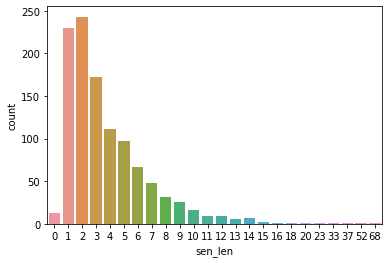

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x = 'sen_len' , data = test)

### >> 패딩

 *  max_length = 15
 *  max_length = 75


In [ ]:
trunc_type = 'post'
padding_type = 'post'
max_length = 75

X_data_p = pad_sequences(X_label_data, truncating=trunc_type, padding = padding_type, maxlen = max_length) 

In [ ]:
X_data_p

array([[585,   0,   0, ...,   0,   0,   0],
       [586,  73,   0, ...,   0,   0,   0],
       [338, 104,   0, ...,   0,   0,   0],
       ...,
       [ 87, 337,   0, ...,   0,   0,   0],
       [143,   0,   0, ...,   0,   0,   0],
       [ 87, 193,  16, ...,   0,   0,   0]], dtype=int32)

### >> label

In [ ]:
y_label = []
for y in y_data['label'].values:
    if y<0.5:
       y_label.append([1,0]) 
    else:
       y_label.append([0,1]) 
       
y_label = np.array(y_label)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(pd.DataFrame(X_data_p), y_label, test_size = 0.2, random_state = 1234)
X_train

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
894,125,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
183,2,388,190,7,389,17,732,733,68,3,...,0,0,0,0,0,0,0,0,0,0
160,43,6,375,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1031,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
378,451,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689,82,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
664,118,40,225,127,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1077,167,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
723,4,533,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


---
## 4. Modeling
---

*   Bi_LSTM



In [ ]:
embedding_dim = 100
model_lstm = tf.keras.Sequential([
            Embedding(vocab_size, embedding_dim),
            Bidirectional(tf.keras.layers.LSTM(128 , return_sequences= True)),
            Bidirectional(tf.keras.layers.LSTM(64)),
            Dense(64, activation = 'relu'),
            Dropout(0.5), 
            Dense(2, activation = 'softmax')
])

In [ ]:
model_lstm.summary()
model_lstm.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 100)         100000    
                                                                 
 bidirectional_8 (Bidirectio  (None, None, 256)        234496    
 nal)                                                            
                                                                 
 bidirectional_9 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 2)                

In [ ]:
#lstm_history = model_lstm.fit(X_train, y_train, validation_split = 0.2, epochs = 5, batch_size = 10)
lstm_history = model_lstm.fit(X_train, y_train, epochs = 5, batch_size = 64)

Epoch 1/5
14/14 [==============================] - 16s 553ms/step - loss: 0.6955 - accuracy: 0.5057
Epoch 2/5
14/14 [==============================] - 8s 556ms/step - loss: 0.6930 - accuracy: 0.5023
Epoch 3/5
14/14 [==============================] - 8s 548ms/step - loss: 0.6841 - accuracy: 0.6096
Epoch 4/5
14/14 [==============================] - 8s 556ms/step - loss: 0.5614 - accuracy: 0.8014
Epoch 5/5
14/14 [==============================] - 8s 565ms/step - loss: 0.3267 - accuracy: 0.8721


In [ ]:
print("\n테스트정확도: {:.2f}%".format(model_lstm.evaluate(X_test, y_test)[1]*100))

7/7 [==============================] - 1s 79ms/step - loss: 0.5460 - accuracy: 0.7763

테스트정확도: 77.63%


In [ ]:
pred = model_lstm.predict(X_test.values)
pred_label = np.argmax(pred, axis = 1)
orig_label = np.argmax(y_test, axis = 1)

In [ ]:
X_test_indices = X_test.index
df_for_check = df.copy()
#df_for_check = df_for_check[df_for_check.index.isin(X_test_indices)]
df_for_check = df_for_check.loc[X_test_indices]
df_for_check['orig'] = orig_label
df_for_check['pred'] = pred_label

In [ ]:
df_for_check

,index,answer,label,nor_answer,orig,pred
60,65,잘어울린다!,1.0,잘어울린다,1,1
330,351,관심가져주고 질문많이 해줘서 고마움,1.0,관심가져주고 질문많이 해줘서 고마움,1,1
1070,1242,무조건..?이라고..? 흠 뭔가 의심이 간다,0.0,무조건이라고 흠 뭔가 의심이 간다,0,0
366,392,마음에 들지만 경계한다,0.3,마음에 들지만 경계한다,0,0
76,84,화이팅,0.7,화이팅,1,1
...,...,...,...,...,...,...
782,919,와 글쿤요^^! 라고 대답하고 집가서 평소처럼 산다 (연락안함),0.0,와 글쿤요 라고 대답하고 집가서 평소처럼 산다 연락안함,0,1
315,335,날 걱정해주다니..고마워 친구..,1.0,날 걱정해주다니고마워 친구,1,1
156,172,빚지는건 오바다,0.0,빚지는건 오바다,0,0
324,344,그럴 수 있지,0.5,그럴 수 있지,1,0


---
# 5. MBTI 출력
---

*   E (1) / I (0)
*   N (1) / S (0)
*   F (1) / T (0)
*   집중 (1) / 분산 (0)
*   수익 (1) / 안전 (0)
*   단기 (1) / 장기 (0)



E객 E주 E주 E객 S주 집중/분산(객) S주 T주 T객 단기/장기(주) 수익/안전(주) T주
수익/안전(객) 집중/분산(객) 집중/분산(주) 투자가능기간(객) 손실범위(객) T주 S객 S객

In [ ]:
answer = ['회식이 전혀 없는 모임', '굳', '서운', '상대에게 먼저 말을 건다', '넹',
          '전기차 테마주를 산다', '고민한다', '왕', '어피치', '그냥그렇다', '안돼',
          '짜증남', '100% 확률로 1억 받기', '여러군데 분산 투자한다.', '무섭다',
          '3년 이상', '20% ~ 30%', '인정받으니까 좋다', '가사', '정말 아무 생각 안한다']

# answer = ['회식이 많은 모임',	'즐긴다',	'집에 가고싶다',	'상대에게 먼저 말을 건다',	'YES',
# 	'전기차 테마주를 산다',	'갑자기 뭔 지진..;; 이라고 생각하면서 대답해준다',	'무슨 일 있었오? ㅠ',
#   '어피치',	'괜히 샀다',	'빚까지 내서 한다고?',	'뭐 해결책을 주려고 저러나?',
#   '100% 확률로 1억 받기',	'여러군데 분산 투자한다.',	'믿을만한 사람인건가?',
#   '3년 이상',	'원금 10% 이내',	'당연하지 너 몰래 열심히 했으니깐 ㅋ',	'멜로디',
#   '정말 아무 생각 안한다']

In [ ]:
location_info = {'e' : [0, 1, 2, 3], 'n' : [4, 6, 18, 19],
                 'f' : [7, 8, 11, 17], 'profit' : [10, 12, 16],
                 'focus' : [5, 13, 14], 'period' : [9, 15]}

In [ ]:
question_type = {'multiple' : [0, 3, 5, 8, 12, 13, 15, 16, 18, 19],
                 'essay' : [1, 2, 4, 6, 7, 9, 10, 11, 14, 17]}

In [ ]:
multiple = []
essay = []
for idx, ans in enumerate(answer):
  if idx in question_type.get('multiple'):
    multiple.append((idx, ans))
  else:
    essay.append((idx, ans))

### >> Multi_pred (객관식 예측값)

In [ ]:
multiple_dict = {
    1 : ['회식이 많은 모임', '상대에게 먼저 말을 건다', '전기차 대표주인 테슬라를 산다', '어피치',
         '50% 확률로 5억 받기', '카카오처럼 한 종목에 몰빵한다', '가사',
         '나중에 주식이 떡상해서 인터뷰를 하게 된다면 할 답변을 생각한다.',
         '6개월 이내', '40% 이상'],
    0 : ['회식이 전혀 없는 모임', '상대가 걸 때까지 기다린다', '전기차 테마주를 산다', '라이언',
         '100% 확률로 1억 받기', '여러군데 분산 투자한다.', '멜로디', '정말 아무 생각 안한다',
         '3년 이상', '원금 10% 이내'],
    0.3 : ['6개월 이상~ 1년 이내', '30% ~ 40%'],
    0.5 : ['1년 이상 ~ 2년 이내', '20% ~ 30%'],
    0.7 : ['10% ~ 20%', '2년 이상 ~ 3년 이내']
}

In [ ]:
multiple_pred = []
for tpl in multiple:
  if tpl[1] in multiple_dict.get(1):
    multiple_pred.append((tpl[0], 1))
  elif tpl[1] in multiple_dict.get(0):
    multiple_pred.append((tpl[0], 0))
  elif tpl[1] in multiple_dict.get(0.3):
    multiple_pred.append((tpl[0], 0.3))
  elif tpl[1] in multiple_dict.get(0.5):
    multiple_pred.append((tpl[0], 0.5))
  elif tpl[1] in multiple_dict.get(0.7):
    multiple_pred.append((tpl[0], 0.7))

### >> Essaay_pred (주관식 예측값)

In [ ]:
essay_text = []
for tpl in essay:
  essay_text.append(tpl[1])

In [ ]:
essay_test = []
for ans in tqdm(essay_text) :
  result = okt.morphs(ans)
  essay_test.append(result)

In [ ]:
essay_ans = token.texts_to_sequences(essay_test)

In [ ]:
trunc_type = 'post'
padding_type = 'post'
max_length = 120
essay_ans_p = pad_sequences(essay_ans, truncating=trunc_type, padding = padding_type, maxlen = max_length)

In [ ]:
pred = model_lstm.predict(essay_ans_p)
pred_label = np.argmax(pred, axis = 1)

In [ ]:
essay_pred = []
for idx, label in enumerate(list(pred_label)):
  essay_pred.append((essay[idx][0], label))

### >> Final

In [ ]:
final = essay_pred + multiple_pred

In [ ]:
def split(key, ans):
  #key = e, n, f, profit, focus, period
  new = []
  for i in location_info.get(key):
    for idx, label in ans:
      if i == idx:
        new.append(label)
        break
  return sum(new) / len(new)

In [ ]:
ans_mean = []
for key in list(location_info.keys()):
   ans_mean.append(split(key, final))

In [ ]:
mbti_dict = {
    'inf':0, 'int':1, 'isf':2, 'enf':3,
    'ist':4, 'ent':5, 'esf':6, 'est':7
}

In [ ]:
def result(ans):
  mbti = ""
  score = 0
  for idx, val in enumerate(ans):
    if idx == 0:
      if val > 0.5: mbti += 'e'
      elif val <= 0.5: mbti += 'i'
      continue
    if idx == 1:
      if val > 0.5: mbti += 'n'
      elif val <=0.5: mbti += 's'
      continue
    if idx == 2:
      if val > 0.5: mbti += 'f'
      elif val <=0.5: mbti += 't'
      continue
    if idx in [3, 4, 5]:
      if val > 0.5: score += 1
      elif val < 0.5: score -= 1
    return mbti, score

In [ ]:
mbti, score = result(ans_mean)
final_score = mbti_dict.get(mbti) + score
if final_score < 0:
  final_mbti = 'inf'
elif final_score > 7:
  final_mbti = 'est'
else:
  for idx, mbti in enumerate(mbti_dict):
    if final_score == idx:
      final_mbti = mbti
      break

In [ ]:
print(final_mbti) #final_mbti 전송!